## 1. Introduction

This notebook is created as a case study to accomplish the Google Data Analytics Certificate.

### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. From these insights, your team will design a new marketing strategy **to convert casual riders into annual members**. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Characters
- **Cyclistic**: a bike-share company, more than 5800 bicycles and 600 docking stations, inclusive to people with disabilities, users are more likely to ride for leisure, 30% for commute every day.
- **Lily Moreno**: director of marketing, your manager, direct audience of the analysis results.
- **Cyclistic marketing analytics team**: a team of data analysts who are responsible for collectiong, analyzing and reporting data to help guide Cyclistic marketing strategy.
- **Cyclistic executive team**: detail-oriented, decision-makers for the recommended marketing program, direct audience of the analysis results.

### Glossar
- **Casual riders**:Customers who purchase single-ride or full-day passes.
- **Cyclistic members**: Customers who purchase annual memberships, more profitable.

### Goal
Design marketing strategies aimed at converting casual riders into annual members.

### Deliverables
The analysis will be presented in the form of a report, including following deliverables:1. 
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of the analysis
5. Supporting visualizations and key findings
6. Top three recommendations based on the analysis

### Deadline
The case study shall be completed in **one week**.

## 2. Ask
To achive the business goal, following questions need to be answered in the data analysis project:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

This notebook aims at answering the **first question**.

**Deliverable: a clear statement of the business task**  
The business task of this analysis is to identify the differences between annual members and casual riders, in order to help the marketing team develop new strategies which will convert casual riders into annual members.  
The key stakeholders of this analysis include: 
- the director of marketing, who will use the analysis results to design new campaigns
- the executive team, who will decide whether to approve the recommended campaigns based on insights from the data
- the analytics team, who might refer the analysis results to answer their own research questions.

## 3. Prepare

In [1]:
import pandas as pd
import numpy as np

df_202302 = pd.read_csv('202302-divvy-tripdata.csv')
df_202302.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member


In [2]:
df_202302['member_casual'].value_counts()

member    147429
casual     43016
Name: member_casual, dtype: int64

In [3]:
df_202302.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    25473
start_station_id      25605
end_station_name      26738
end_station_id        26879
start_lat                 0
start_lng                 0
end_lat                 116
end_lng                 116
member_casual             0
dtype: int64

**Deliverable: a description of all data sources used**  

Cyclistic keeps its historical trip data from 2013 till today. For the current analysis, only **the trip data from past 12 months** will be used. The data is stored in a consistent, structured format including following columns: *ride_id*, *rideable_type*, *stated_at*, *ended_at*, *start_station_name*, *start_station_id*, *end_station_name*, *end_station_id*, *start_lat*, *start_lng*, *end_lat*, *end_lng*, *member_casual*. Historical data from earlier years such as 2013 is stored in different tables, but will not be used here. 

Since the data comes from a first-hand source, it has certain credibility, and should be reliable as well as original. Besides, the data is current because it is updated every month. We can hardly tell for the moment if the data is comprehensive enough to help us answer the business questions mentioned above. Also, since it is internal data, it might not have been cited much.  

The data from the past 12 months solely contains information about the trips and does not involve any personal details, so in this case we are rather comfortable with privacy issues, and anonymization is not necessary. Despite of that, the data should be stored in a secure way to avoid unauthorized access, as it is part of the company's digital assets. Usage for any purposes other than adressing the current business task will need separate licensing.

The data's integrity, i.e. its overall accuracy, completeness and consistency depends mostly on how it is collected. In this case, supposing the data is automatically collected by the system every time a trip was conducted, it should be accurate, complete and consistent. However, a quick glimpse into the 2023-02 data shows that there are quite a few missing values, which require further investigation.  

The dataset contains the column *member_casual*, which tells us if a ride was conducted by an annual member or a casual rider. This is an important label of each entry. If we group the data by this column, we will be able to find out how other columns behave differently based on individual user types. However, with this dataset, we can only find out how annual members differ from casual riders in terms of riding behaviour, since the dataset only contains information about trips such as their duration, start and end location. We won't be able to reveal any demographical differences such as age and gender distribution of annual memebers and casual riders, or their geographical dispersation respectively.

## 4. Process
In this step, we will inspect the data to see its quality and process it so that we can work with the dataset more efficiently later. I choose to do it with Python in the Jupyter Notebook environment, so that the cleaning process and results are clearly documented.

In [4]:
# import all the csv files
import glob
files = glob.glob('*.csv')
df = [pd.read_csv(f) for f in files]

# and concatenate them into one dataframe
trip_df = pd.concat(df, ignore_index = True)

# show the head of the dataframe
trip_df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member


In [5]:
# how many rows and columns does the dataset have
trip_df.shape

(5829084, 13)

In [6]:
# check the data type of each column
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829084 entries, 0 to 5829083
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 578.1+ MB


In [7]:
# according to the start and end time, we can calculate each trip's duration in seconds 
# and store the value in a new column called ride_length
trip_df['ride_length'] = pd.to_datetime(trip_df['ended_at']) - pd.to_datetime(trip_df['started_at'])
trip_df['ride_length'] = trip_df['ride_length'].apply(lambda x : x.seconds)
trip_df['ride_length']

0           377
1           378
2           166
3           588
4          2530
           ... 
5829079     644
5829080     602
5829081     920
5829082    1009
5829083     720
Name: ride_length, Length: 5829084, dtype: int64

In [8]:
# create another column called day_of_week to record the trip was conducted on which weekday
trip_df['day_of_week'] = trip_df['started_at'].apply(lambda x: (pd.to_datetime(x).weekday())+1)
trip_df['day_of_week']

0          1
1          3
2          3
3          2
4          1
          ..
5829079    3
5829080    7
5829081    2
5829082    3
5829083    3
Name: day_of_week, Length: 5829084, dtype: int64

In [9]:
# we mentioned earlier that the dataset contains missing values, let's have a look
trip_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    850418
start_station_id      850550
end_station_name      909038
end_station_id        909179
start_lat                  0
start_lng                  0
end_lat                 5938
end_lng                 5938
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

In [10]:
'''
start_station_name, start_station_id, end_station_name, end_station_id contain missing values to various degrees, 
end_lat and end_lng also have some missing values, this phenomenon raises the question of how the data is collected, 
let us have a closer look of rows with missing values.
'''

# when start_station_name is missing
trip_df[trip_df['start_station_name'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
4320,B67FC1FBD2262260,electric_bike,2022-03-25 17:05:25,2022-03-25 22:15:53,NaN,NaN,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.63,41.891466,-87.626761,member,18628,5
4321,F2010B440B66DA76,electric_bike,2022-03-25 09:54:43,2022-03-25 10:04:20,NaN,NaN,Desplaines St & Randolph St,15535,41.90,-87.63,41.884616,-87.644571,member,577,5
4322,929952970B8AD1C6,electric_bike,2022-03-22 10:41:51,2022-03-22 13:48:39,NaN,NaN,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.63,41.891466,-87.626761,member,11208,2
4323,E54EE70FD34E7BEA,electric_bike,2022-03-22 15:16:26,2022-03-22 15:17:46,NaN,NaN,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.63,41.891466,-87.626761,member,80,2
4550,886225EF5CE1FA9C,electric_bike,2022-03-08 17:25:56,2022-03-08 17:30:38,NaN,NaN,Campbell Ave & North Ave,13257,41.91,-87.68,41.910535,-87.689556,member,282,2


In [11]:
# when end_station_nanme is missing
trip_df[trip_df['end_station_name'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
382,23E9237F6315DB63,electric_bike,2022-03-13 15:48:05,2022-03-13 16:06:42,Elizabeth (May) St & Fulton St,13197,NaN,NaN,41.886553,-87.658343,41.90,-87.69,casual,1117,7
383,1EDF7EBD6B90160C,electric_bike,2022-03-12 23:57:52,2022-03-13 00:04:35,Broadway & Berwyn Ave,13109,NaN,NaN,41.978332,-87.659832,41.98,-87.66,casual,403,6
384,204EA47A41CA365F,electric_bike,2022-03-25 17:02:39,2022-03-25 17:19:14,Elizabeth (May) St & Fulton St,13197,NaN,NaN,41.886570,-87.658453,41.89,-87.63,casual,995,5
385,09A9C9E4F6943F9C,electric_bike,2022-03-17 09:38:28,2022-03-17 09:47:13,Elizabeth (May) St & Fulton St,13197,NaN,NaN,41.886559,-87.658464,41.89,-87.64,casual,525,4
30739,60024D49494C5528,electric_bike,2022-03-03 10:27:15,2022-03-03 10:56:43,Fort Dearborn Dr & 31st St,TA1307000048,NaN,NaN,41.838475,-87.608292,41.79,-87.60,member,1768,4


In [12]:
# when end_lat is missing
trip_df[trip_df['end_lat'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
30855,080802E2B6B65E8B,classic_bike,2022-03-17 15:11:55,2022-03-18 16:11:50,Cottage Grove Ave & 83rd St,585,NaN,NaN,41.743441,-87.604836,NaN,NaN,casual,3595,4
30914,42E8E4373F5C95C3,classic_bike,2022-03-27 16:05:43,2022-03-28 17:05:21,Aberdeen St & Randolph St,18062,NaN,NaN,41.884114,-87.654264,NaN,NaN,casual,3578,7
30939,EF0AC23F8EDC9092,docked_bike,2022-03-21 10:41:14,2022-03-21 11:45:09,Orleans St & Merchandise Mart Plaza,TA1305000022,NaN,NaN,41.888243,-87.636390,NaN,NaN,casual,3835,1
30989,6C64D71AC86DFDC7,classic_bike,2022-03-02 18:59:44,2022-03-03 19:59:35,Fairfield Ave & Roosevelt Rd,KA1504000102,NaN,NaN,41.866624,-87.694521,NaN,NaN,casual,3591,3
31294,59839085BFD5572A,docked_bike,2022-03-20 17:30:44,2022-03-23 12:50:15,DuSable Lake Shore Dr & North Blvd,LF-005,NaN,NaN,41.911722,-87.626804,NaN,NaN,casual,69571,7


In [13]:
''' 
It seems that start_station_name and start_station_id are usually missing together, same for end_station_name and 
end_station_id, end_lat and end_lng. We can hardly tell why these data are missing without knowing how they were collected.
In this case, talking to the people who were responsible for the data collection might help to clear the situation.
'''

# how many different values does start_station_name have
trip_df['start_station_name'].nunique()

1692

In [14]:
# are the missing values of start_station_name all located in the same period of time? not likely
pd.to_datetime(trip_df[trip_df['start_station_name'].isna()]['started_at']).value_counts()

2022-11-07 17:12:40    4
2022-08-19 13:02:27    4
2022-04-21 15:35:09    4
2022-07-26 17:41:24    4
2022-08-19 15:36:25    4
                      ..
2022-06-26 12:30:13    1
2022-06-21 23:47:45    1
2022-06-28 18:41:11    1
2022-06-16 12:17:57    1
2023-02-28 17:37:53    1
Name: started_at, Length: 829562, dtype: int64

In [15]:
'''
We do not need to deal with the missing values for the moment because the corresponding variables will not be used in the
following analysis. But this data quality issue should be kept in mind, as it affects the general data integrity and leaves
a question mark on the way how data was collected.
'''
# let's explore the dataset a bit more to familiarize ourselves with it, starting with the categorical variables
pd.set_option('display.float_format', lambda x: '%.2f' % x)
trip_df.describe(include = 'object')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5829084,5829084,5829084,5829084,4978666,4978534,4920046,4919905,5829084
unique,5829084,3,4891324,4904887,1692,1314,1715,1318,2
top,47EC0A7F82E65D52,electric_bike,2022-05-30 13:05:15,2022-08-22 12:47:49,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2983084,9,20,75992,75992,76152,76152,3463964


In [16]:
'''
As can be seen from the table above:
- ride_id is the unique key of this dataset
- there are three rideable types, and electic bike is the most popular one
- Streeter Dr & Grand Ave is both the most frequent start and end point
- annual members contributed about 58% of the total rides
'''

# how about the numerical variables?
trip_df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,5829084.00,5829084.00,5823146.00,5823146.00,5829084.00,5829084.00
mean,41.90,-87.65,41.90,-87.65,978.81,4.05
std,0.05,0.03,0.07,0.11,1950.73,1.98
min,41.64,-87.84,0.00,-88.14,0.00,1.00
25%,41.88,-87.66,41.88,-87.66,344.00,2.00
50%,41.90,-87.64,41.90,-87.64,609.00,4.00
75%,41.93,-87.63,41.93,-87.63,1094.00,6.00
max,42.07,-87.52,42.37,0.00,86399.00,7.00


In [17]:
'''
According to the mininum, maximum, mean and standard deviation, the values of start_lat and start_lng seem to be 
reasonable. However, end_lat and end_lng contains not only missing values, but also 0.00, which is an unrealistic 
geographical point if we are talking about locations in Chicago. 
Also, the ride_length has the minimum value of 0 seconds. Let us have a closer look.
'''

print(trip_df[trip_df['ride_length'] == 0].shape)
trip_df[trip_df['ride_length'] == 0].head(3)

(437, 15)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
8370,BE6D32CCD2C8C9BA,classic_bike,2022-03-28 18:20:59,2022-03-28 18:20:59,Franklin St & Lake St,TA1307000111,Franklin St & Lake St,TA1307000111,41.89,-87.64,41.89,-87.64,casual,0,1
26911,ED243C51D5046FEA,electric_bike,2022-03-20 15:09:31,2022-03-20 15:09:31,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.96,-87.64,41.96,-87.64,member,0,7
26914,8D4DB330D85196A4,electric_bike,2022-03-05 14:26:44,2022-03-05 14:26:44,Clark St & Lake St,KA1503000012,Clark St & Lake St,KA1503000012,41.89,-87.63,41.89,-87.63,casual,0,6


In [18]:
'''
There are 437 records of such trips. Again, we can hardly tell why they only last 0 seconds without knowing how the data was
collected, but they appear to be erroneous and I will drop them.
'''

trip_df.drop(trip_df[trip_df['ride_length'] == 0].index, inplace=True)
trip_df.shape

(5828647, 15)

## 5. Analyze

Now the dataset has been prepared and processed, we can start to grab some insights from it. Remember the question we are trying to answer is **how do annual members and casual riders use Cyclistic bikes differently**. After inspecting the dataset, the question can be formulated a bit more precisely: how are these two groups differ from each other in terms of
- ride length
- day of the week
- seasonal change

In [19]:
'''
ride_length: according to the table above, the average ride length is 978.81 seconds (ca. 16 minutes). The longest ride 
was 86399.00 seconds (ca. 24 hours!). Let us have a look how the two groups behave differently regarding ride length.
'''

# generate a summary table for ride length grouped by user types
trip_df.groupby(['member_casual'])['ride_length'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2364912.00,1331.87,2687.73,1.00,434.00,770.00,1432.00,86399.00
member,3463735.00,737.88,1152.60,1.00,303.00,524.00,907.00,86399.00


#### Insight 1: casual riders conduct significantly longer rides than annual members.
The average ride length for casual riders is 1332 seconds, whereas for annual members only 738 seconds. Also, the quartiles and median of casual riders are longer than those of annual members. Although we have removed all the rides that last 0 second, both group now have the shortest trip of 1 second, which is still a questionable value.

In [20]:
# day_of_week: which day of the week do casual riders and annual members conduct the most rides?
trip_df.groupby(['day_of_week', 'member_casual']).size()

day_of_week  member_casual
1            casual           283305
             member           488599
2            casual           272297
             member           546586
3            casual           279882
             member           542403
4            casual           313612
             member           547360
5            casual           338776
             member           481157
6            casual           478425
             member           454789
7            casual           398615
             member           402841
dtype: int64

#### Insight 2: annual members use Cyclistic more often during the week, probably for commute purpose.
Annual memebers conduct more rides from Tuesday to Thursday, and casual riders use Cyclistic mostly on the weekend.

In [21]:
# how about the average ride length for each group on every day of the week?
pd.pivot_table(trip_df, values = 'ride_length', index = ['day_of_week'], columns = ['member_casual'], 
              aggfunc = np.mean, fill_value = 0)

member_casual,casual,member
day_of_week,,
1,1353.99,711.24
2,1186.13,699.15
3,1139.45,702.83
4,1186.13,713.29
5,1249.91,725.82
6,1499.54,825.08
7,1533.86,819.32


Text(0, 0.5, 'number of rides')

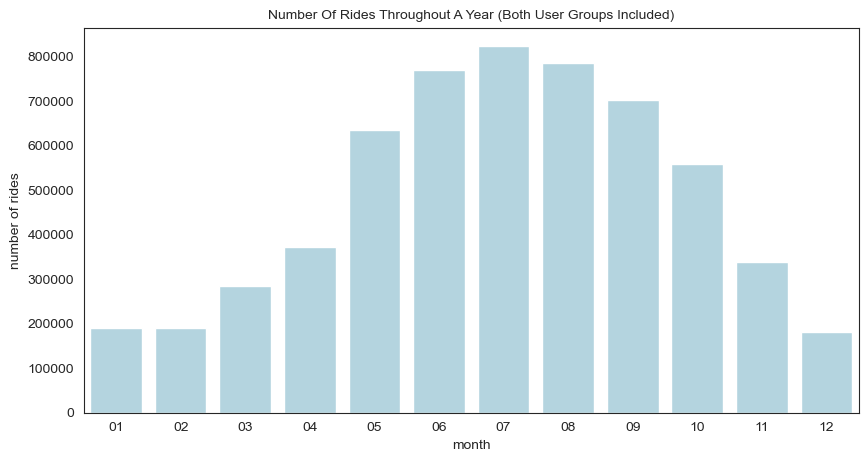

In [22]:
'''
On every day of the week, casual riders take longer rides than annual members, which corresponds to Insight 1 above.
For both groups, rides on the weekend are generally longer than those during the week.
'''
# import libraries so that we can plot the seasonal trend
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# seasonal change: do the two user groups behave differently throughout the year? 
# we need to first extract the month of each trip
trip_df['month'] = trip_df['started_at'].apply(lambda x: x[5:7])

# plot the trend throughout the year without differentiating the two user groups
sns.set_style('white')
plt.figure(figsize = (10, 5))
order_month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
sns.countplot(x = trip_df['month'], order = order_month, color = 'lightblue')
plt.title('Number Of Rides Throughout A Year (Both User Groups Included)', fontsize = 10)
plt.ylabel('number of rides')

Text(0, 0.5, 'number of rides')

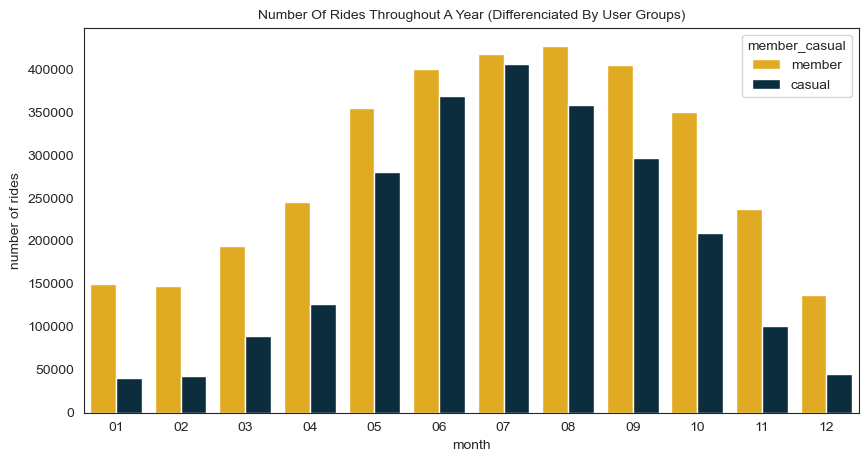

In [23]:
'''
People tend to use Cyclistic way more often during summer (June to August) than during winter, with spring and autumn as 
transitional period in between.
'''

# does this trend also exist among each user group?
plt.figure(figsize = (10, 5))
sns.countplot(x = trip_df['month'], order = order_month, hue = trip_df['member_casual'], 
             palette = {'casual':'#023047', 'member':'#ffb703'})
plt.title('Number Of Rides Throughout A Year (Differenciated By User Groups)', fontsize = 10)
plt.ylabel('number of rides')

#### Insight 3: both annual members and casual riders conduct more trips in summer and less in winter.
Although this trend exists in both groups, it is more prominent among casual riders.

  
**Deliverable: a summary of your analysis**  
So far, we've checked the data integrity, added new variables, cleaned questionable values and performed some analysis on the dataset to gain insights. Although the quality of the dataset in this case is not ideal, and it lacks comprehensiveness to answer our question from different aspects, we could still extract some useful information from the analysis results:

**Insight 1: casual riders conduct significantly longer rides than annual members.**  
Based on this, we need to highlight the cost savings of annual membership: Casual riders who conduct significantly longer rides can be encouraged to become annual members by emphasizing the cost savings they can achieve with an annual subscription. The company could create marketing campaigns that show the savings of an annual subscription compared to the cost of multiple single-ride or full-day passes.  

**Insight 2: annual members use Cyclistic more often during the week, probably for commute purpose.**  
Offer incentives for weekday rides: Annual members use Cyclistic more often during the week, so the company can offer incentives for casual riders to use the service during weekdays. This could include discounts on weekday rides, free additional ride time, or other perks that make it more attractive to use Cyclistic for commuting or other weekday activities.

**Insight 3: both annual members and casual riders conduct more trips in summer and less in winter.**  
Launch seasonal promotions: The company can launch seasonal promotions to encourage casual riders to become annual members during the off-season. For example, the company could offer discounted annual subscriptions during the winter months to entice casual riders to become annual members and continue to use Cyclistic throughout the year.

By implementing these strategies, the bike-sharing company can increase its annual subscription base and reduce its reliance on casual riders, leading to more stable revenue and long-term growth.


## 6. Visualization

There are indeed some differences between annual members and casual riders, and we need to convey these information to the detail oriented excecutive team. Considering that *1. they won't have much knowledge in reading the dataset tables or Jupyter Notebook* and *2. won't have much time to go into the details of this analysis*, we need to transform the insights into a format that is easy to digest - a presentation with data visualizations. I will create the visuals in Jupyter Notebook and import them into Google Slides to create a presentation.

First, let's save the processed dataset.

In [24]:
'''
replace 'member' with 'Annual Member' and 'casual' with 'Casual Rider' in the member_casual column, and change the 
column name to User Group for better labeling later in the visualizations.
'''

trip_df['member_casual'].replace({'member': 'Annual Member', 'casual': 'Casual Rider'}, inplace = True)
trip_df.rename(columns = {'member_casual':'User Group'}, inplace = True)
trip_df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,User Group,ride_length,day_of_week,month
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.89,-87.63,41.89,-87.64,Annual Member,377,1,03
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90,-87.62,41.90,-87.64,Annual Member,378,3,03


In [25]:
# save the dataset
trip_df.to_csv('Cyclistic_trip_data_clean_15032023_V00.csv')  

Now we can start to visualize **the first insight: casual riders conduct significantly longer rides than annual members**. Here we want to compare two numeric values, and the contrast can be made clear through size of graphical elements. Therefore, I choose bar chart to fulfill the purpose.

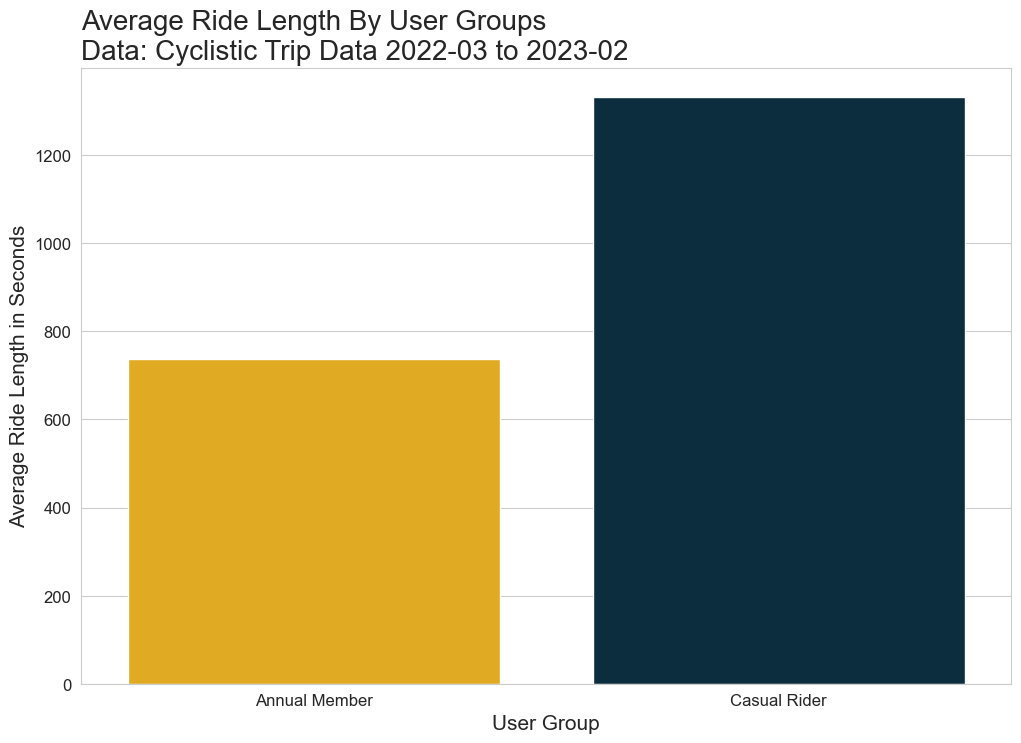

In [26]:
# aggregate data and turn the result into a dataframe
df_ride_length = trip_df.groupby(['User Group'])['ride_length'].mean().reset_index()

# plot the dataframe
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df_ride_length, x = 'User Group', y = 'ride_length',
            palette = {'Casual Rider':'#023047', 'Annual Member':'#ffb703'})
            # from now on I will use consistent color for annual members (warm yellow) and casual riders (dark blue)
plt.xlabel('User Group', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Average Ride Length in Seconds', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average Ride Length By User Groups \nData: Cyclistic Trip Data 2022-03 to 2023-02', 
         loc = 'left', fontsize = 20)
plt.savefig('01_Average Ride Length By User Groups.png')

In [27]:
#this fact is still true if we compare the average ride length of each user group by every day of the week

# aggregate data and turn the result into a dataframe
df_ride_length_weekday =  trip_df.groupby(['User Group', 'day_of_week'])['ride_length'].mean().reset_index()
df_ride_length_weekday

,User Group,day_of_week,ride_length
0,Annual Member,1,711.24
1,Annual Member,2,699.15
2,Annual Member,3,702.83
3,Annual Member,4,713.29
4,Annual Member,5,725.82
5,Annual Member,6,825.08
6,Annual Member,7,819.32
7,Casual Rider,1,1353.99
8,Casual Rider,2,1186.13
9,Casual Rider,3,1139.45


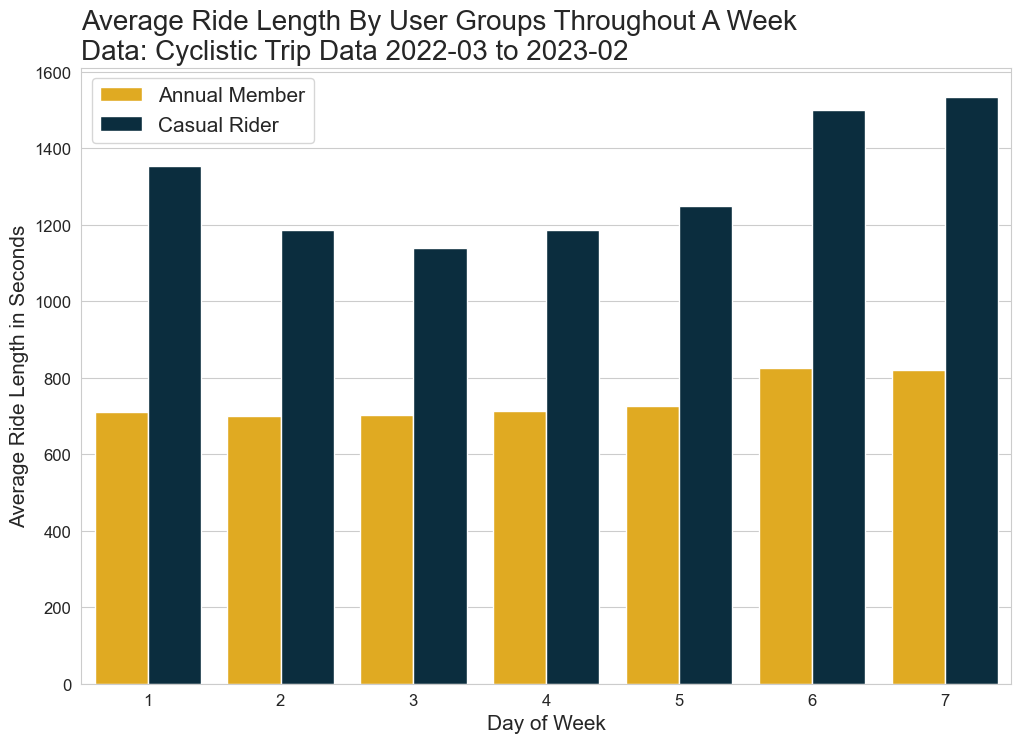

In [28]:
# plot the dataframe
plt.figure(figsize = (12, 8))
sns.barplot(data = df_ride_length_weekday, hue = 'User Group', x = 'day_of_week', y = 'ride_length',
            palette = {'Casual Rider':'#023047', 'Annual Member':'#ffb703'})
plt.legend(fontsize = 15)
plt.xlabel('Day of Week', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Average Ride Length in Seconds', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average Ride Length By User Groups Throughout A Week\nData: Cyclistic Trip Data 2022-03 to 2023-02', 
         loc = 'left', fontsize = 20)
plt.savefig('02_Average Ride Length By User Groups And By Day Of Week.png')

Let's continue with **the second insight: annual members use Cyclistic more often during the week**. This is still a comparision between two variables, so I will again use barplot, but this time in an overlapping form.

In [29]:
# aggregate data and turn the result into a dataframe
df_weekday_count = trip_df.groupby(['day_of_week', 'User Group']).size().reset_index()
df_weekday_count.columns = ('Day of Week', 'User Group', 'Number of Rides')
df_weekday_count

,Day of Week,User Group,Number of Rides
0,1,Annual Member,488599
1,1,Casual Rider,283305
2,2,Annual Member,546586
3,2,Casual Rider,272297
4,3,Annual Member,542403
5,3,Casual Rider,279882
6,4,Annual Member,547360
7,4,Casual Rider,313612
8,5,Annual Member,481157
9,5,Casual Rider,338776


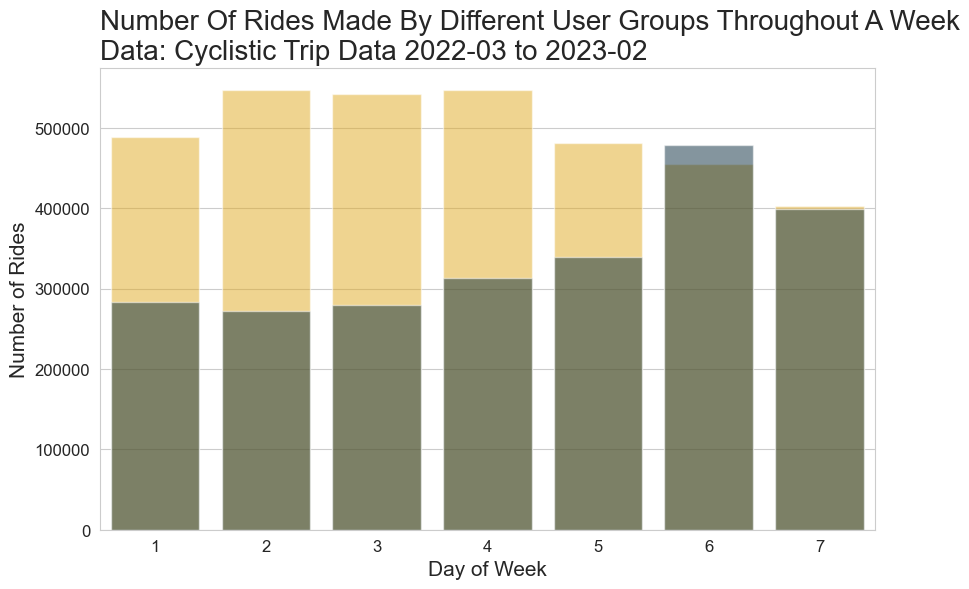

In [30]:
# plot the dataframe
plt.figure(figsize = (10, 6))
sns.barplot(data = df_weekday_count[df_weekday_count['User Group'] == 'Annual Member'], 
            x = 'Day of Week', y = 'Number of Rides',
           color = '#ffb703', alpha = 0.5)
sns.barplot(data = df_weekday_count[df_weekday_count['User Group'] == 'Casual Rider'], 
            x = 'Day of Week', y = 'Number of Rides',
           color = '#023047', alpha = 0.5)
plt.xticks(fontsize = 12)
plt.xlabel('Day of Week', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Rides', fontsize = 15)
plt.title('Number Of Rides Made By Different User Groups Throughout A Week\nData: Cyclistic Trip Data 2022-03 to 2023-02', 
         loc = 'left', fontsize = 20)
plt.savefig('03_Number Of Rides By User Group By Day Of Week.png')

As for the third insight, **both annual members and casual riders conduct more trips in summer and less in winter**, we visualized it with a bar plot above. To add some variaty to our visualizations, I will visualize it again with a line graph to better demonstrate the trend over a year.

In [31]:
# aggregate data and turn the result into a dataframe
df_month = trip_df.groupby(['month', 'User Group']).size().reset_index()
df_month.columns = (['Month', 'User Group', 'Number of Rides'])
df_month.head(4)

,Month,User Group,Number of Rides
0,01,Annual Member,150288
1,01,Casual Rider,40005
2,02,Annual Member,147423
3,02,Casual Rider,43014


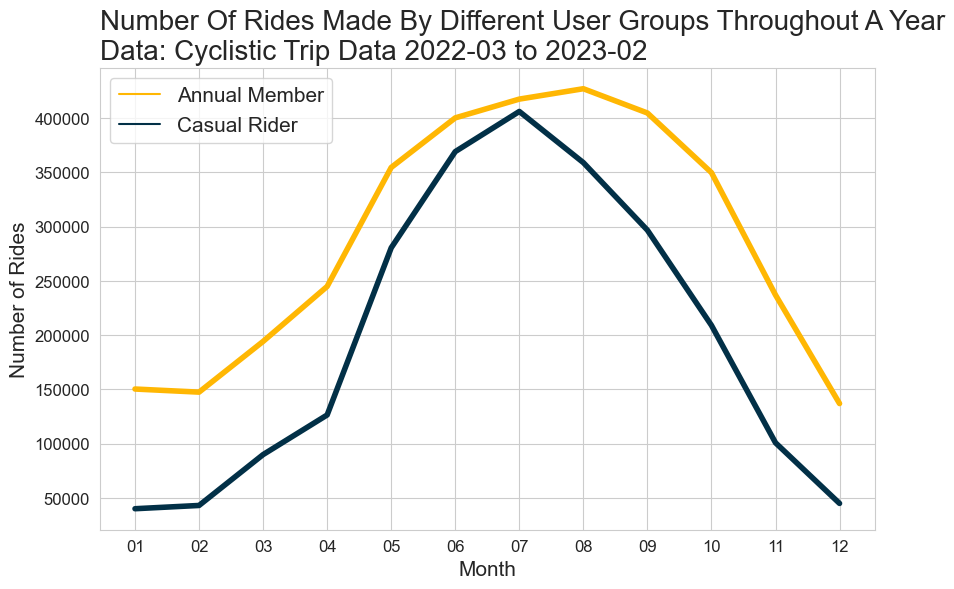

In [32]:
# plot the dataframe
plt.figure(figsize = (10, 6))
sns.lineplot(data = df_month, x = 'Month', y = 'Number of Rides', hue = 'User Group',
             palette = {'Casual Rider':'#023047', 'Annual Member':'#ffb703'}, linewidth = 4)
plt.legend(fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Number of Rides', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Number Of Rides Made By Different User Groups Throughout A Year\nData: Cyclistic Trip Data 2022-03 to 2023-02', 
         loc = 'left', fontsize = 20)
plt.savefig('03_Number Of Rides By User Group By Month.png')

## 7. What's next?

Till this point, we have successfully processed and analyzed the dataset, generated useful insights, and visualized them with various graphs. Next, we will move on to Google Slides and summarize the analysis project and its results into a informative presentation, as it will be the final deliverable to the audience - the director of marketing and the executive team.

The presentation can be found [here](https://github.com/xiaowedance/Google_DA_Certificate_Case_Study01_Cyclistic/blob/cd15abb5bc2ddfdca98ce43d50564442a76ca0db/Google%20DA%20Certificate%20-%20Cyclistic%20Bike-share%20Analysis%20Presentation.pdf).

*Version 00   
2023-03-15  
Creater: Xiao Wang*